Mean Squared Error: 0.78
R-squared: -0.01


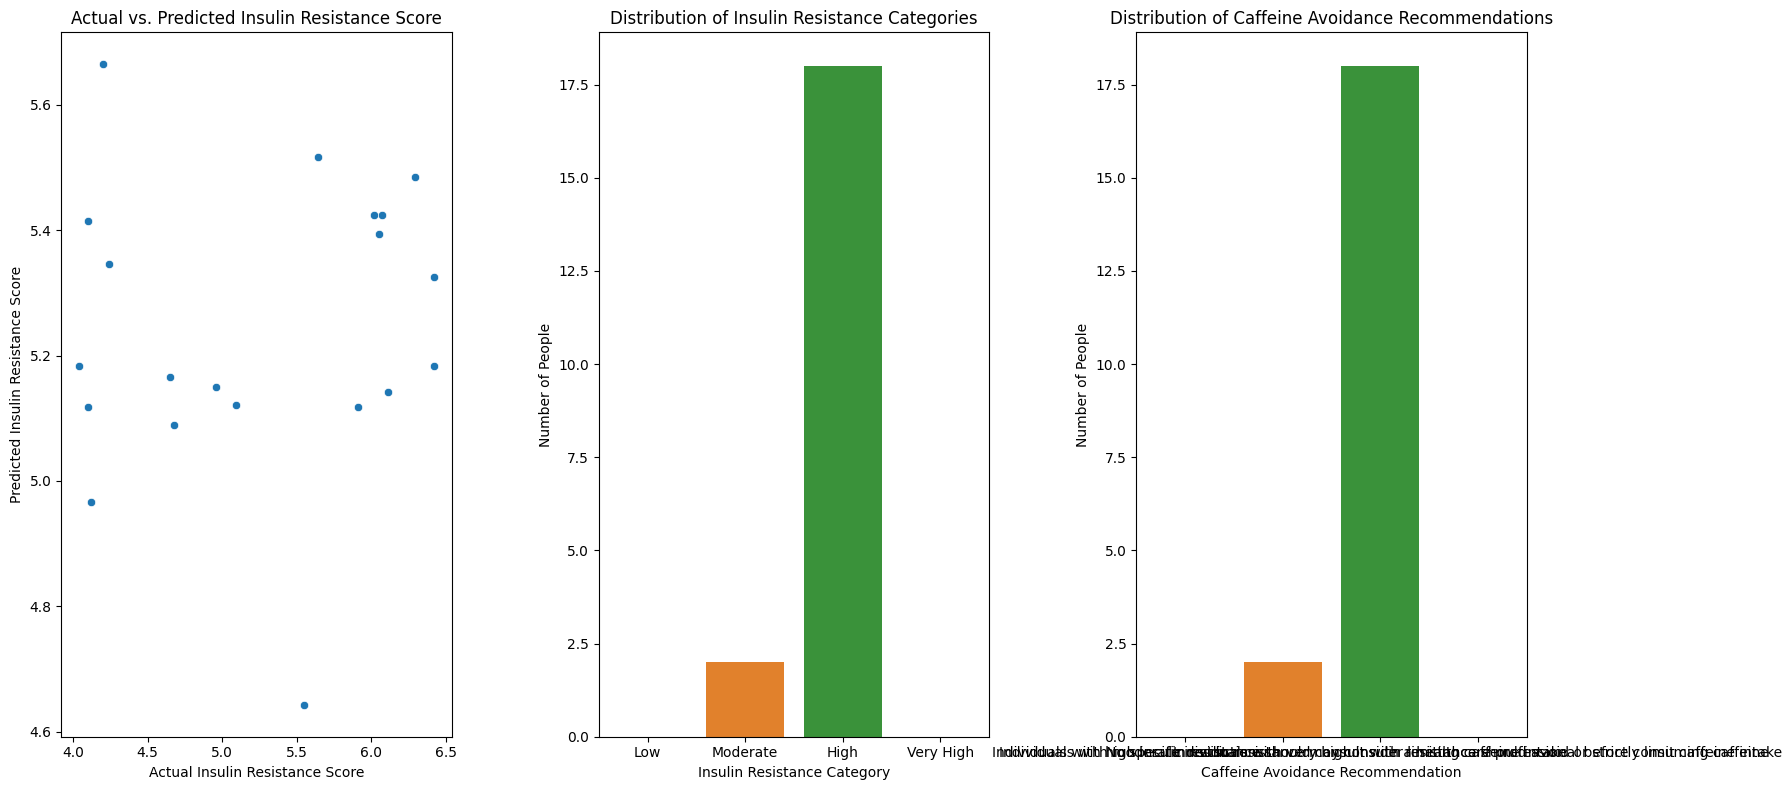

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dummy dataset from a CSV file
file_path = 'caffeine.csv'
data = pd.read_csv(file_path)

# Define features (X) and target variable (y)
features = ['Caffeine Intake (mg)', 'Age', 'Height (cm)', 'Weight (kg)']
target = 'Insulin Resistance Score'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Create a DataFrame for visualization
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Categorize predicted insulin resistance scores into different groups
bins = [0, 4, 5, 6, np.inf]
labels = ['Low', 'Moderate', 'High', 'Very High']
results['Insulin Category'] = pd.cut(results['Predicted'], bins=bins, labels=labels)

# Hypothetical mapping of insulin resistance categories to who should avoid caffeine
avoid_caffeine_mapping = {
    'Low': 'No specific restrictions',
    'Moderate': 'Individuals with moderate insulin resistance may consider limiting caffeine intake',
    'High': 'Individuals with high insulin resistance should consult with a healthcare professional before consuming caffeine',
    'Very High': 'Individuals with very high insulin resistance should avoid or strictly limit caffeine intake'
}

# Apply the mapping to create a new column for caffeine avoidance recommendations
results['Caffeine Avoidance Recommendation'] = results['Insulin Category'].map(avoid_caffeine_mapping)

# Visualize the distribution of insulin categories, affected body systems, and caffeine avoidance recommendations
plt.figure(figsize=(18, 8))

# Subplot 1: Scatter plot of actual vs. predicted values
plt.subplot(1, 3, 1)
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.xlabel('Actual Insulin Resistance Score')
plt.ylabel('Predicted Insulin Resistance Score')
plt.title('Actual vs. Predicted Insulin Resistance Score')

# Subplot 2: Count plot of insulin categories
plt.subplot(1, 3, 2)
sns.countplot(x='Insulin Category', data=results, order=labels)
plt.xlabel('Insulin Resistance Category')
plt.ylabel('Number of People')
plt.title('Distribution of Insulin Resistance Categories')

# Subplot 3: Count plot of caffeine avoidance recommendations
plt.subplot(1, 3, 3)
sns.countplot(x='Caffeine Avoidance Recommendation', data=results, order=avoid_caffeine_mapping.values())
plt.xlabel('Caffeine Avoidance Recommendation')
plt.ylabel('Number of People')
plt.title('Distribution of Caffeine Avoidance Recommendations')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()
